# Images and Priors

In [11]:
import numpy as np
import os
import pandas as pd

fig_dir = "../experiments/ne_mnist/figures/prior/"
os.makedirs(fig_dir, exist_ok=True)

NORMALIZE = True  # whether to normalize the offset of the prior

MODEL_DIR = "../experiments/ne_mnist/"
INVERT_MODE = "cvx_cg"
perturb_mode = "gaussian"

PRIOR_DIR = os.path.join(MODEL_DIR, "prior")
result_dir = os.path.join(PRIOR_DIR, INVERT_MODE, perturb_mode, "all")

img_size = (28, 28)

In [12]:
# visualization settings
idx_map = {
    "gaussian": [0, 4],
    "gaussian_clip": [0, 4],
    "blur": [26, 30],
    "convex": [3, 5],
}
idx_list = idx_map[perturb_mode]
col_idx = None


# load data
df = pd.read_csv(os.path.join(result_dir, "prior.csv"))

In [13]:
if NORMALIZE:
    min_val = df.min().min()
    df = df - min_val

In [14]:
if col_idx is None:
    col_idx = np.arange(df.shape[1])
df = df.iloc[idx_list, col_idx]
p_array = df.values

x_array = np.load(os.path.join(result_dir, "x.npy"))
x_array = x_array[idx_list, :, :][:, col_idx, :]

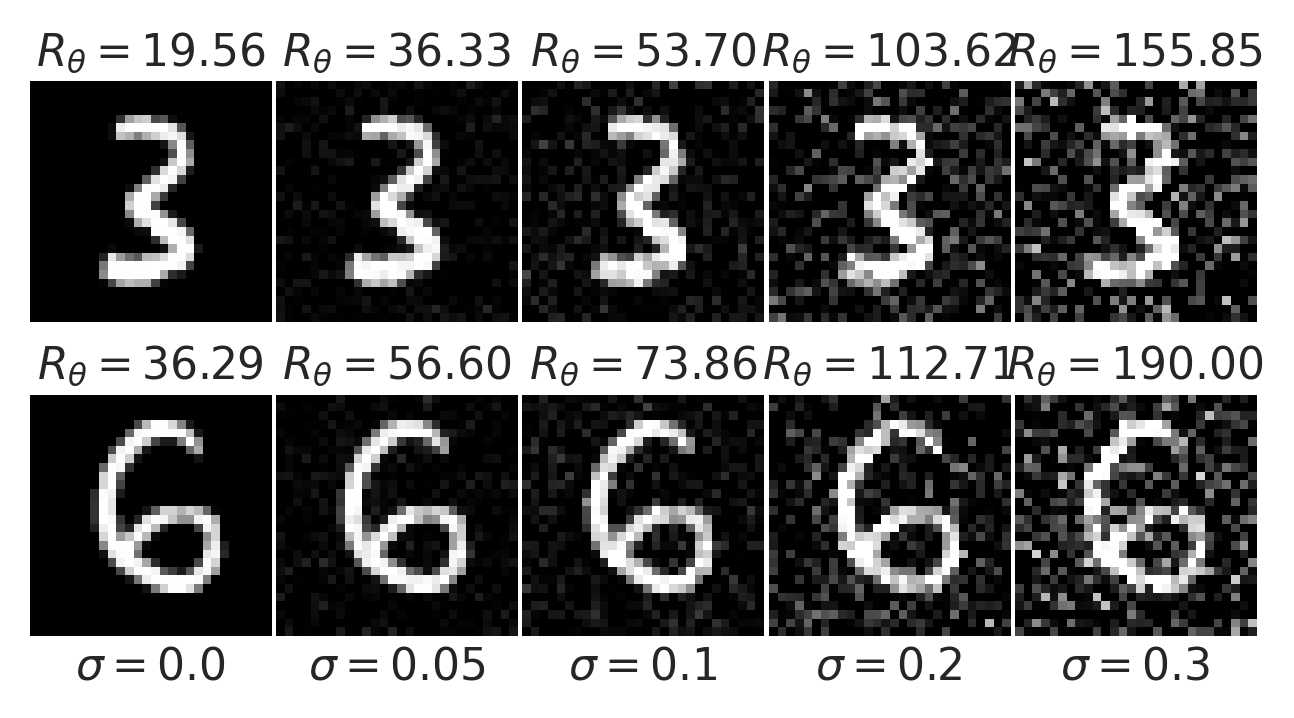

In [15]:
# plot
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

sns.set()
sns.set_context("paper", font_scale=1.1)

nc, nr = len(col_idx), len(idx_list)
figw = 6
figh = figw * nr / nc
fig = plt.figure(figsize=(figw, figh), dpi=300)
gs = GridSpec(nr, nc, wspace=-0.4, hspace=0.3)
for i in range(nr):
    for j in range(nc):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(
            x_array[i, j].reshape(img_size),
            cmap="gray",
            interpolation="none",
            vmin=0,
            vmax=1,
        )
        ax.axis("off")
        ax.annotate(
            r"$R_\theta = {:.2f}$".format(p_array[i, j]),
            xy=(0.5, 1.07),
            xycoords="axes fraction",
            ha="center",
        )
        if i == 0:
            if perturb_mode == "convex":
                symbol = r"$\lambda$"
            else:
                symbol = r"$\sigma$"
            ax.annotate(
                r"{}$={}$".format(symbol, df.columns[j]),
                xy=(0.5, -1.48),
                xycoords="axes fraction",
                ha="center",
            )
plt.show()
os.makedirs(fig_dir, exist_ok=True)
fig.savefig(
    os.path.join(fig_dir, f"ne_mnist_{perturb_mode}.png"),
    bbox_inches="tight",
)